# $N^3$ Joint 

This program generates dangling ends within the DNA network for inter-assembly between DNA rectangles.
E.g., if you are building a cube, you need 4 rectangles, and the program will generate internal joints complementary
between the 4 rectangles. The combination will be in the form:

$$ s_1 \rightarrow s_2 \rightarrow s_3 \rightarrow s_4 \rightarrow s_1$$  

where $s_n$ is the DNA network generated by `DNApoly` = 3 x 4 or 4 x 4 configuration.

How did we load the sequence?
* Call `parseFile.py` to generate _clean_ sequence from the raw data file
* Output is available via __TMP_PARSE__, we can load the sequences there

> <font color = red>__TODO__:</font> Change the function to accept any URL as argument for input and output

In [1]:
s1 = ['GTAAGACGATCACCTTAACTTCTAG',
     'AGGTGATCGTCTTAC',
     'CTGCCGACATCAGGTCAGGCTCCGAACAGTAGATGGTGGAAGAGTATTCCGCTCGATGCTTATCGGTATCCTGGA',
     'GAATTCCTGCACTATACTGTTCGGAGCCTGACCTGATGTCGGCAGCTAGAAGTTA',
     'TCCAGGATACCGATAAGCATCGAGCGGAATACTCTTCCACCATCTCTCCACAAGG',
     'ATGCAACTCGCCTTGTGGAGATAGTGCAGGAATTCCAAGACTCGA',
     'CCTCTGACACTAAGATCGTTGCTATGACGTTCGAGTCTTG',
     'GCGACCATGAGTGATTCTTAGTGTCAGAGG',
     'ACGTCATAGCAACGAATGGACACGTCAAGCTCAAG',
     'AATCTCATGCCTTGAGCTTGACGTGTCCATATCACTCATGGTCGC',
     'CGAGTTGCATGTTAGGACGTACTCACTACCACGTA',
     'GCATGAGATTCCCATTTGATGATTCGCGTTAGTGGTTCCTACGACAAGATGCAGATGAGTACGTCCTAAC',
     'TACGTGGTAGATCCGTCGAT',
     'ATCGACGGATTCTGCATCTTGTCGTAGGAACCACTAACGCGAATCATCAAATGGG']

s2 = ['TCCAAAGAAGGGCTCAATCCAGCTG',
      'GAGCCCTTCTTTGGA',
      'CTGCGATAAACTGATTGACCCTGAAGCTTGACTCTCTAGATCGTGTGTTCGCTATCCTTCCTATGAAGTTGGTGG',
      'TAAGCCTCGGTGCCACAAGCTTCAGGGTCAATCAGTTTATCGCAGCAGCTGGATT',
      'CCACCAACTTCATAGGAAGGATAGCGAACACACGATCTAGAGAGTTTTGATAGCT',
      'ACTGAGGTCTAGCTATCAAATGGCACCGAGGCTTACATTGTCGTG',
      'AGGTCGTATATCAACACCTTAGAAAGGTGCCACGACAATG',
      'GGCGCACAAGGGCACGTTGATATACGACCT',
      'GCACCTTTCTAAGGTCATCCTAGGGCCCGAGGACC',
      'GGATCGGATTGGTCCTCGGGCCCTAGGATGGTGCCCTTGTGCGCC',
      'AGACCTCAGTGACGGCTCAATAGGCACTGTAGCTC',
      'AATCCGATCCAGAGAATTTCAATAAACAGGATTGCCTTGCCTTAACGGCTTGGACGCCTATTGAGCCGTC',
      'GAGCTACAGTGTCCTTACAC',
      'GTGTAAGGACGTCCAAGCCGTTAAGGCAAGGCAATCCTGTTTATTGAAATTCTCT']

s3 = ['TCCGAATGCTGAATCGGTAGCTTGT',
      'GATTCAGCATTCGGA',
      'CAACGGCATCAACTCTGTATCGGTATAGGAGGACACGCCGAATGAACACGCTAGCAAACTATCGGGTGTCCGGGT',
      'TGTCCTGGTAGCCCGTCCTATACCGATACAGAGTTGATGCCGTTGACAAGCTACC',
      'ACCCGGACACCCGATAGTTTGCTAGCGTGTTCATTCGGCGTGTCCGGCTCTACCG',
      'AATCATCAAGCGGTAGAGCCCGGGCTACCAGGACAGTCCACAGCT',
      'GAATACACTACGAAACAGTGTAGTAACAACAGCTGTGGAC',
      'TACCTTGTAAGGAGCTTTCGTAGTGTATTC',
      'GTTGTTACTACACTGATAACTCGGAAGCATCCGCA',
      'TAAAAATCCATGCGGATGCTTCCGAGTTATGCTCCTTACAAGGTA',
      'CTTGATGATTGCCAGTGCAGGGTTGACGGACGTCC',
      'TGGATTTTTAAACATTAGAGCAGAGCCGGACAACTCTAGCCTATTACTTCATTTTCAACCCTGCACTGGC',
      'GGACGTCCGTGGCCAGGAAG',
      'CTTCCTGGCCAAAATGAAGTAATAGGCTAGAGTTGTCCGGCTCTGCTCTAATGTT']

s4 = ['ATGGCCGGTGATTGGTAGGCAGTTC',
      'CCAATCACCGGCCAT',
      'AACCGTAGCGTGAGTCTCTAACTCTGGGATCGCTGAACTTGCTCAGGAGCCAGTGCCTCTAGACCCAACAGCGCG',
      'TGGTCGTTATATTAGATCCCAGAGTTAGAGACTCACGCTACGGTTGAACTGCCTA',
      'CGCGCTGTTGGGTCTAGAGGCACTGGCTCCTGAGCAAGTTCAGCGCTGTCATAGA',
      'GGTCTTCTACTCTATGACAGCTAATATAACGACCAATGGGCTAGA',
      'CCCTTGAAACTACAAAGGCGTCATCTAGGATCTAGCCCAT',
      'CCCGCCTATCGTCGATTGTAGTTTCAAGGG',
      'TCCTAGATGACGCCTACGAACTTAGCCCACCGCGA',
      'GAGAGAATCATCGCGGTGGGCTAAGTTCGTTCGACGATAGGCGGG',
      'GTAGAAGACCTCTTTCAGCGACGTTAGGCCGCATC',
      'TGATTCTCTCATCCAAGCTGGTCACGTTCTTCGGCAGTCCCTGACTTGAGTAGTAAACGTCGCTGAAAGA',
      'GATGCGGCCTAGGAGGGTCG',
      'CGACCCTCCTTACTACTCAAGTCAGGGACTGCCGAAGAACGTGACCAGCTTGGAT']

Read config file - **CURRENT** the config file contains assembly arrangement of the sequences with complementary
strands. We've added the flag (`N` or `R`) to indicate direction. However, __the information from the manifold__ seems
to be incomplete.

How do we construct the config file?
* This is a tricky bit, we are using the default sequence file e.g. `ITBLDefineSeq.txt`, and work out the orientation
of the strands according to predicted 2D folding.
* Assignment of `R` or `N` will be based on the schematic -- we can pre-configure these files for all shapes

In [44]:
config_data = [[1,25,0,0,0,0,0,'N'],
               [2,15,1,15,1,1,15,'R'],
               [3,75,0,0,0,0,0,'N'],
               [4,55,16,45,3,1,30,'R'],
               [4,55,46,55,1,16,25,'N'],
               [5,55,1,45,3,31,75,'R'],
               [6,45,21,35,4,1,15,'R'],
               [6,45,11,20,5,46,55,'R'],
               [7,40,31,40,6,36,45,'N'],
               [8,30,16,30,7,1,15,'N'],
               [9,35,1,15,7,16,30,'R'],
               [10,45,31,45,8,1,15,'R'],
               [10,45,11,30,9,16,35,'R'],
               [11,35,1,10,6,1,10,'N'],
               [12,70,56,70,11,11,25,'R'],
               [12,70,1,10,10,1,10,'N'],	
               [13,20,1,10,11,26,35,'R'],
               [14,55,11,55,12,11,55,'R'],
               [14,55,1,10,13,11,20,'R']]

HOMO binding = so the position of the joints can be fixed. We need dangling ends at each end (complementary).
> <font color = red>__TODO__:</font> Hetero binding = different joint positions.
> Why is __Hetero__ difficult?
> * The complexity of the orientation between shapes - i.e., orientation and base positions for differ between shapes,
therefore, we need _intelligence_ to define the association between shapes.
> For the `HEXA` project, we will use hetero rectangles as a baseline to solve this issue

* `constructJoint` - function to generate random bases for joints (also dangling ends), no intelligence, just generate
random bases given the parameter length ($l$) $\Rightarrow$ return joints
* `setComplement` - function to generate complementary bases given sequence $\Rightarrow$ return complementary
in the correct ($5'$) direction.

> <font color = red>__TODO__:</font> Both functions can be converted to generators

In [45]:
import random
def constructJoint(length):
  bases = ['A', 'T', 'C', 'G']
  tmp = ''
  for i_ in range(0, length):
    tmp += random.choice(bases)
  return tmp

def setComplement(seq):
  tmp = ''
  for sq in seq:
    if sq == 'C':
      tmp += 'G'
    elif sq == 'G':
      tmp += 'C'
    elif sq == 'A':
      tmp += 'T'
    elif sq == 'T':
      tmp += 'A'
  return tmp[::-1]

* `setSeq` - function to combine the joints / complementary joints with the strands $\Rightarrow$ return
complete strand
* `extractBp` - function to extract complementary base pair positions $\Rightarrow$ return list of rows

> Why are we checking `row[3] == 'C'`? This is to insert complementary sequences. The 'C' flag is to indicate
complementary region as per the config manifest (below)

In [46]:
def setSeq(seq, tmp, flg):
  if flg == 'E':
    return seq + tmp
  else:
    return tmp + seq

def extractBp(dt):
    arr_tmp = []
    for row in dt:
        if row[3] == 'C':
            arr_tmp.append(row)
    return arr_tmp

I think we need our own manifest file to construct the joints - since the binding assignments are fixed regardless
of the sequence variation, we are going to fix the elongated positions. This manifest file will change depending on
the configuration.

> <font color = red>__TODO__:</font> We need a parser to read different configuration files and work out the joint
regions for hetero assembly (discussed above).

> What is `E` and `F`? Both are markers , to indicate where to add the joints. `F` is at the front of the original
strand and `E` is at the end of the original strand.

In [47]:
# This is for ITBL configuration  
# 5-end [I2=02, B1=07, B2=08, B2=08], 
# 3-end [T3=05, L1=11, L3=13, L3=03]
ITBL_pt = [[2,'I2','E','O'],
           [7,'B1','F','O'],
           [8,'B2','E','O'],
           [8,'B2','F','O'],
           [5,'T3','F','C'],
           [11,'L1','E','C'],
           [13,'L3','F','C'],
           [13,'L3','E','C']]

* `elongateJoint` function - generate joint region based on the parameters set in the manifest file $\Rightarrow$
return list of joints

In [48]:
def elongateJoint(s_, pt_data):
  arr_tmp = []
  for row in pt_data:
    idx_ = row[0] - 1
    if row[3] == 'O':
      tmp = constructJoint(10)
      s_[idx_] = setSeq(s_[idx_], tmp, row[2])
      arr_tmp.append(tmp)
  return arr_tmp

* `closeJoint` function - generate the complementary regions for the joints generated from the `elongateJoint`
$\Rightarrow$ return the new elongated sequence (with `Close - C` flag)

In [49]:
def closeJoint(s_, row_bp, seq_cmp):
    idx_ = row_bp[0] - 1
    tmp = setComplement(seq_cmp)
    s_[idx_] = setSeq(s_[idx_], tmp, row_bp[2])
    return s

Let's put everything together. We will use $S_1, S_2, S_3,$ and $S_4$ as example for homogeneous assembly of a cube.
The assembly works as follows, the joints from $S_1$ will have complementary region in $S_2$, $S_2$ and $S_3$, $S_3$
with $S_4$, and finally $S_4$ with $S_1$

In [50]:
# Main function to run to generate joints and elongate our rectangles
# Generate array of joint-regions
l_rec = [s1, s2, s3, s4]
joint_b = []
for i in l_rec:
    joint_b.append(elongateJoint(i, ITBL_pt))

# Generate complementary for joint-regions
l_rec_c = [s2, s3, s4, s1]
l_bp_c = extractBp(ITBL_pt)
for jt, s, in zip(joint_b, l_rec_c):
    for t, i in zip(jt, l_bp_c):
        i = closeJoint(s, i, t)

Printing output for all strings

In [52]:
s1, s2, s3, s4

(['GTAAGACGATCACCTTAACTTCTAG',
  'AGGTGATCGTCTTACTTACAAATTA',
  'CTGCCGACATCAGGTCAGGCTCCGAACAGTAGATGGTGGAAGAGTATTCCGCTCGATGCTTATCGGTATCCTGGA',
  'GAATTCCTGCACTATACTGTTCGGAGCCTGACCTGATGTCGGCAGCTAGAAGTTA',
  'TCCAGGATACCGATAAGCATCGAGCGGAATACTCTTCCACCATCTCTCCACAAGGACTGATAATT',
  'ATGCAACTCGCCTTGTGGAGATAGTGCAGGAATTCCAAGACTCGA',
  'TGTGAAGCTACCTCTGACACTAAGATCGTTGCTATGACGTTCGAGTCTTG',
  'AAGCCTCGCCGCGACCATGAGTGATTCTTAGTGTCAGAGGTGACTCTTCC',
  'ACGTCATAGCAACGAATGGACACGTCAAGCTCAAG',
  'AATCTCATGCCTTGAGCTTGACGTGTCCATATCACTCATGGTCGC',
  'CGAGTTGCATGTTAGGACGTACTCACTACCACGTATGGCAAGCGC',
  'GCATGAGATTCCCATTTGATGATTCGCGTTAGTGGTTCCTACGACAAGATGCAGATGAGTACGTCCTAAC',
  'TCTTTGCGCCTACGTGGTAGATCCGTCGATGGACTCGAAA',
  'ATCGACGGATTCTGCATCTTGTCGTAGGAACCACTAACGCGAATCATCAAATGGG'],
 ['TCCAAAGAAGGGCTCAATCCAGCTG',
  'GAGCCCTTCTTTGGAACGTATTATT',
  'CTGCGATAAACTGATTGACCCTGAAGCTTGACTCTCTAGATCGTGTGTTCGCTATCCTTCCTATGAAGTTGGTGG',
  'TAAGCCTCGGTGCCACAAGCTTCAGGGTCAATCAGTTTATCGCAGCAGCTGGATT',
  'CCACCAACTTCATAGGAAGGATAGCGAA

### NUPACK evaluation section

> <font color = yellow>__UPDATE__:</font> 21/05/2021 - `NUPACK4.0`
> We are changing the base-pair equilibrium analysis using the new `NUPACK4.0` package.
> The package is available http://www.nupack.org/ - downloaded and installed following the user documentation.

Fixed sequences for the cube - to test the `nupack` function call. Each wall has 14 strands ($s[N]i$ ,
where $i = 1$ to $14$). We then form complexes to represent walls (combination of the 14 strands), and supercomplex
which represents the hollow rectangle.

Analysis of th structure will be performed on `pfunc`, `pairs`, `mfe` and `ensemble_size`

> <font color = green>__DONE__:</font> Run the analysis on parallel mode - to speed up processing time
> Result of the runs with/out multi-threaded are available below. `nupack` allows activation of paralellism
> using the `config` option. However, the utilisation of GPU core is still questionable. Further analysis
> is required to speed up the processing.
>
> We MUST do separate runs - i.e., if a supra structure requires combination of walls / rectangles, we might
> not have the processing power to analyse the complexes in solution. Currently, concentration is exluded
> from the analysis.

In [15]:
# Import NUPACK Python module
from nupack import *

# Define physical model
my_model = Model(material = 'dna', celsius = 23)

# Define strand species
s1_1 = Strand('GTAAGACGATCACCTTAACTTCTAG', name = 's1_1')
s1_2 = Strand('AGGTGATCGTCTTACTGGCAGAGTC', name = 's1_2')
s1_3 = Strand('CTGCCGACATCAGGTCAGGCTCCGAACAGTAGATGGTGGAAGAGTATTCCGCTCGATGCTTATCGGTATCCTGGA', name = 's1_3')
s1_4 = Strand('GAATTCCTGCACTATACTGTTCGGAGCCTGACCTGATGTCGGCAGCTAGAAGTTA', name = 's1_4')
s1_5 = Strand('TCCAGGATACCGATAAGCATCGAGCGGAATACTCTTCCACCATCTCTCCACAAGGTATCACTGAT', name = 's1_5')
s1_6 = Strand('ATGCAACTCGCCTTGTGGAGATAGTGCAGGAATTCCAAGACTCGA', name = 's1_6')
s1_7 = Strand('TAAACAACCACCTCTGACACTAAGATCGTTGCTATGACGTTCGAGTCTTG', name = 's1_7')
s1_8 = Strand('GCTCGATCACGCGACCATGAGTGATTCTTAGTGTCAGAGGAAGTCGATGC', name = 's1_8')
s1_9 = Strand('ACGTCATAGCAACGAATGGACACGTCAAGCTCAAG', name = 's1_9')
s1_10 = Strand('AATCTCATGCCTTGAGCTTGACGTGTCCATATCACTCATGGTCGC', name = 's1_10')
s1_11 = Strand('CGAGTTGCATGTTAGGACGTACTCACTACCACGTAATGTTTTATT', name = 's1_11')
s1_12 = Strand('GCATGAGATTCCCATTTGATGATTCGCGTTAGTGGTTCCTACGACAAGATGCAGATGAGTACGTCCTAAC', name = 's1_12')
s1_13 = Strand('GTCTAAAGCGTACGTGGTAGATCCGTCGATGCATGGTAGG', name = 's1_13')
s1_14 = Strand('ATCGACGGATTCTGCATCTTGTCGTAGGAACCACTAACGCGAATCATCAAATGGG', name = 's1_14')

s2_1 = Strand('TCCAAAGAAGGGCTCAATCCAGCTG', name = 's2_1')
s2_2 = Strand('GAGCCCTTCTTTGGAACATACCGTG', name = 's2_2')
s2_3 = Strand('CTGCGATAAACTGATTGACCCTGAAGCTTGACTCTCTAGATCGTGTGTTCGCTATCCTTCCTATGAAGTTGGTGG', name = 's2_3')
s2_4 = Strand('TAAGCCTCGGTGCCACAAGCTTCAGGGTCAATCAGTTTATCGCAGCAGCTGGATT', name = 's2_4')
s2_5 = Strand('CCACCAACTTCATAGGAAGGATAGCGAACACACGATCTAGAGAGTTTTGATAGCTGACTCTGCCA', name = 's2_5')
s2_6 = Strand('ACTGAGGTCTAGCTATCAAATGGCACCGAGGCTTACATTGTCGTG', name = 's2_6')
s2_7 = Strand('CCTAAGTTTTAGGTCGTATATCAACACCTTAGAAAGGTGCCACGACAATG', name = 's2_7')
s2_8 = Strand('ACTCATCCCAGGCGCACAAGGGCACGTTGATATACGACCTCGCGCAAGGG', name = 's2_8')
s2_9 = Strand('GCACCTTTCTAAGGTCATCCTAGGGCCCGAGGACC', name = 's2_9')
s2_10 = Strand('GGATCGGATTGGTCCTCGGGCCCTAGGATGGTGCCCTTGTGCGCC', name = 's2_10')
s2_11 = Strand('AGACCTCAGTGACGGCTCAATAGGCACTGTAGCTCTGGTTGTTTA', name = 's2_11')
s2_12 = Strand('AATCCGATCCAGAGAATTTCAATAAACAGGATTGCCTTGCCTTAACGGCTTGGACGCCTATTGAGCCGTC', name = 's2_12')
s2_13 = Strand('GCATCGACTTGAGCTACAGTGTCCTTACACGTGATCGAGC', name = 's2_13')
s2_14 = Strand('GTGTAAGGACGTCCAAGCCGTTAAGGCAAGGCAATCCTGTTTATTGAAATTCTCT', name = 's2_14')

s3_1 = Strand('TCCGAATGCTGAATCGGTAGCTTGT', name = 's3_1')
s3_2 = Strand('GATTCAGCATTCGGATCCTTAATAA', name = 's3_2')
s3_3 = Strand('CAACGGCATCAACTCTGTATCGGTATAGGAGGACACGCCGAATGAACACGCTAGCAAACTATCGGGTGTCCGGGT', name = 's3_3')
s3_4 = Strand('TGTCCTGGTAGCCCGTCCTATACCGATACAGAGTTGATGCCGTTGACAAGCTACC', name = 's3_4')
s3_5 = Strand('ACCCGGACACCCGATAGTTTGCTAGCGTGTTCATTCGGCGTGTCCGGCTCTACCGCACGGTATGT', name = 's3_5')
s3_6 = Strand('AATCATCAAGCGGTAGAGCCCGGGCTACCAGGACAGTCCACAGCT', name = 's3_6')
s3_7 = Strand('CCGTTTCGATGAATACACTACGAAACAGTGTAGTAACAACAGCTGTGGAC', name = 's3_7')
s3_8 = Strand('CGCAGTTGAATACCTTGTAAGGAGCTTTCGTAGTGTATTCCCATGACGTG', name = 's3_8')
s3_9 = Strand('GTTGTTACTACACTGATAACTCGGAAGCATCCGCA', name = 's3_9')
s3_10 = Strand('TAAAAATCCATGCGGATGCTTCCGAGTTATGCTCCTTACAAGGTA', name = 's3_10')
s3_11 = Strand('CTTGATGATTGCCAGTGCAGGGTTGACGGACGTCCAAAACTTAGG', name = 's3_11')
s3_12 = Strand('TGGATTTTTAAACATTAGAGCAGAGCCGGACAACTCTAGCCTATTACTTCATTTTCAACCCTGCACTGGC', name = 's3_12')
s3_13 = Strand('CCCTTGCGCGGGACGTCCGTGGCCAGGAAGTGGGATGAGT', name = 's3_13')
s3_14 = Strand('CTTCCTGGCCAAAATGAAGTAATAGGCTAGAGTTGTCCGGCTCTGCTCTAATGTT', name = 's3_14')

s4_1 = Strand('ATGGCCGGTGATTGGTAGGCAGTTC', name = 's4_1')
s4_2 = Strand('CCAATCACCGGCCATATCAGTGATA', name = 's4_2')
s4_3 = Strand('AACCGTAGCGTGAGTCTCTAACTCTGGGATCGCTGAACTTGCTCAGGAGCCAGTGCCTCTAGACCCAACAGCGCG', name = 's4_3')
s4_4 = Strand('TGGTCGTTATATTAGATCCCAGAGTTAGAGACTCACGCTACGGTTGAACTGCCTA', name = 's4_4')
s4_5 = Strand('CGCGCTGTTGGGTCTAGAGGCACTGGCTCCTGAGCAAGTTCAGCGCTGTCATAGATTATTAAGGA', name = 's4_5')
s4_6 = Strand('GGTCTTCTACTCTATGACAGCTAATATAACGACCAATGGGCTAGA', name = 's4_6')
s4_7 = Strand('AATAAAACATCCCTTGAAACTACAAAGGCGTCATCTAGGATCTAGCCCAT', name = 's4_7')
s4_8 = Strand('CCTACCATGCCCCGCCTATCGTCGATTGTAGTTTCAAGGGCGCTTTAGAC', name = 's4_8')
s4_9 = Strand('TCCTAGATGACGCCTACGAACTTAGCCCACCGCGA', name = 's4_9')
s4_10 = Strand('GAGAGAATCATCGCGGTGGGCTAAGTTCGTTCGACGATAGGCGGG', name = 's4_10')
s4_11 = Strand('GTAGAAGACCTCTTTCAGCGACGTTAGGCCGCATCATCGAAACGG', name = 's4_11')
s4_12 = Strand('TGATTCTCTCATCCAAGCTGGTCACGTTCTTCGGCAGTCCCTGACTTGAGTAGTAAACGTCGCTGAAAGA', name = 's4_12')
s4_13 = Strand('CACGTCATGGGATGCGGCCTAGGAGGGTCGTTCAACTGCG', name = 's4_13')
s4_14 = Strand('CGACCCTCCTTACTACTCAAGTCAGGGACTGCCGAAGAACGTGACCAGCTTGGAT', name = 's4_14')

# Define complexes
poly1 = Complex([s1_1, s1_2, s1_3, s1_4, s1_5, s1_6, s1_7, s1_8, s1_9, s1_10, s1_11, s1_12, s1_13, s1_14], name = 'Sq1')
poly2 = Complex([s2_1, s2_2, s2_3, s2_4, s2_5, s2_6, s2_7, s2_8, s2_9, s2_10, s2_11, s2_12, s2_13, s2_14], name = 'Sq2')
poly3 = Complex([s3_1, s3_2, s3_3, s3_4, s3_5, s3_6, s3_7, s3_8, s3_9, s3_10, s3_11, s3_12, s3_13, s3_14], name = 'Sq3')
poly4 = Complex([s4_1, s4_2, s4_3, s4_4, s4_5, s4_6, s4_7, s4_8, s4_9, s4_10, s4_11, s4_12, s4_13, s4_14], name = 'Sq4')
poly5 = Complex([s1_1, s1_2, s1_3, s1_4, s1_5, s1_6, s1_7, s1_8, s1_9, s1_10, s1_11, s1_12, s1_13, s1_14,
                 s2_1, s2_2, s2_3, s2_4, s2_5, s2_6, s2_7, s2_8, s2_9, s2_10, s2_11, s2_12, s2_13, s2_14,
                 s3_1, s3_2, s3_3, s3_4, s3_5, s3_6, s3_7, s3_8, s3_9, s3_10, s3_11, s3_12, s3_13, s3_14,
                 s4_1, s4_2, s4_3, s4_4, s4_5, s4_6, s4_7, s4_8, s4_9, s4_10, s4_11, s4_12, s4_13, s4_14], name = 'Rec')

# Define complex set comprising all monomers plus additional specified complexes
my_set = ComplexSet(strands = [s1_1, s1_2, s1_3, s1_4, s1_5, s1_6, s1_7, s1_8, s1_9, s1_10, s1_11, s1_12, s1_13, s1_14,
                              s2_1, s2_2, s2_3, s2_4, s2_5, s2_6, s2_7, s2_8, s2_9, s2_10, s2_11, s2_12, s2_13, s2_14,
                              s3_1, s3_2, s3_3, s3_4, s3_5, s3_6, s3_7, s3_8, s3_9, s3_10, s3_11, s3_12, s3_13, s3_14,
                              s4_1, s4_2, s4_3, s4_4, s4_5, s4_6, s4_7, s4_8, s4_9, s4_10, s4_11, s4_12, s4_13, s4_14],
                    complexes = SetSpec(max_size = 1, include = (poly1, poly2, poly3, poly4, poly5)))

In [16]:
# Config params for parallelism
config.parallelism = True
config.cache = 20.0

# Analyze the set of complexes
print('RUNNING NUPACK !')
import timeit

tic = timeit.default_timer()
set_result = complex_analysis(complexes = my_set, compute = ['pfunc', 'pairs', 'subopt', 'ensemble_size'],
                              model = my_model)
toc = timeit.default_timer()
print(toc - tic)

# RUN time result with multi-thread = 1185.942236625
# RUN time result without multi-thread = 1599.0759897909993

RUNNING NUPACK !
33.95922658299969


We need to process the results separately - might be too heavy for jupyter to process it.
This will work better in normal python mode. There are a few things that we can evaluate here.

* MFE for generated complexes
* Suboptimal folding between complexes
* Partition function for complexes
* Base pair probabilities

We should ignore the rectangles -- sequences are optimised during design stage. Maybe ?

The way we are getting the base-pair is a bit tricky -- we might need some manifold file to
process this -- which is not the most effective way, especially when we have hetero assembly
later on.

In [68]:
# Manifest file for base-pairing comparison
# ITBL pairings

bp_o = [[41,50], [641,650], [681,690],
        [386,395], [986,995], [1026,1035],
        [731,740], [1231,1240], [1271,1280],
        [1076,1085], [296,305], [336,345]]

bp_c = [[451,460], [116,125], [166,175],
        [796,805], [461,470], [511,520],
        [1041,1050], [806,815], [856,865],
        [106,115], [1051,1060], [1101,1110]]

In [80]:
# Analysis of results (`set_result`)

#print('\nMFE proxy structure(s):')
#for plex, result in set_result.complexes.items():
#    print('%20s: %50s     (%.2f kcal/mol)' % (plex.name, result.mfe[0].structure.rle_dotparensplus(), result.mfe[0].energy))

"""
    checkBpairs - check the base pairs from bpair nupack calculation
    :params lst_o: list of open brackets
    :params st_c: start index of close brackets
    :params arr_bp: base pair array -- from nupack
    :return: base pair counter and total bases
"""
def checkBpairs(lst_o, st_c, bp_arr):
    count = 0
    total = 0
    for itr in range(lst_o[0], lst_o[1] + 1):
        if bp_arr[itr][st_c] > 0.0:
            count += 1
        st_c += 1
        total += 1
    return count, total

# function call to evaluate base pair (in main)
counter_all = 0
total_all = 0
bpairs = set_result['Rec'].pairs.to_array()
for o_idx, c_idx in zip(bp_o, bp_c):
    ctr, tt = checkBpairs(o_idx, c_idx[0], bpairs)
    total_all += tt
    counter_all += ctr

# print total base pair between joints
print(counter_all / total_all)

0.275


#### NUPACK evaluation archive section

We will evaluate the base pairing probabilities given by `NUPACK`. Currently, the evaluation is rather crude, the
accuracy metric will compare the ideal base pairing positions against the most probable pairs suggested by `NUPACK`
using the `pairs` analysis function with {`-dangles = all`, `cutoff = 0.1`}.

Let $X$ be a set of base pair $x_{i,j}$ where $i$ and $j$ represent the base positions in strand ($s_n$), and $Y$ as
a set of desired base pairs $y_{i,j}$. If $x_{i,j} == y_{i,j}$, then the base pair formation is correct. From `.epairs`
output file generated from `NUPACK`, we will only take the pairs with the highest probability values (__NOTE__: the file
contains all possible pairs).

How to run the `pairs NUPACK` program?
* Preparation of file
> <font color = red>__TODO__:</font> Manually based on the manifold configuration (will only involve sequences with
> dangling ends -- to simplify the computation e.g., `N3_C01_M.in`, `N3_C01.in` manifold `N3_C01_MAN.in`)
* `pairs -multi -dangles all -cutoff 0.1 <filename>`

In [32]:
import pandas as pd
df = pd.read_csv('ppairs_dt.csv', sep='\t')
df.head()

,Bp1,Bp2,Prob
0,1,40,0.35371
1,2,39,0.38590
2,3,38,0.86265
3,4,37,0.96418
4,5,36,0.99186


Ideally, we want a base pairing probability plot. However, the number of bases involved in our shape is rather large.
Rather than plotting the complete base configurations, we will only show the most favorable pairings

In [33]:
import matplotlib.pyplot as plt

lst_bp = df['Bp1'].unique()

# Find the most favorable pairings
arr_bp = []
for i in lst_bp:
    df_tmp = df[df['Bp1'] == i]
    idx = df_tmp['Prob'].idxmax()
    arr_bp.append(df.loc[idx].to_numpy().tolist())

df_bp = pd.DataFrame(arr_bp)
df_bp

,0,1,2
0,1.0,1381.0,0.37488
1,2.0,1381.0,0.50815
2,3.0,38.0,0.86265
3,4.0,37.0,0.96418
4,5.0,36.0,0.99186
...,...,...,...
1191,1368.0,1381.0,0.28427
1192,1369.0,1381.0,0.35249
1193,1370.0,1381.0,0.33293
1194,1372.0,1381.0,0.32335


Now that we have our most favorable pairings, we'll run comparison with our targeted pairings. This is very crude right
now because the percentages representing the accuracy will be 1 to 1 comparison = we can actually use a more suitable
distance measure for evaluation.

In [34]:
# Prepping dataset for targeted pairings -- this is generated from the config file
# [TODO] - script to generate the config file automatically

# [01 == 02] 0001:0015 - 0026:0040 [02 == 11] 0041:0050 - 0451:0460 [15 == 04] 0641:0650 - 0116:0125
# [04 == 05] 0126:0140 - 0191:0205 [16 == 05] 0681:0690 - 0166:0175 [05 == 06] 0176:0190 - 0246:0260
# [09 == 10] 0346:0360 - 0371:0385 [10 == 19] 0386:0395 - 0796:0805 [23 == 12] 0986:0995 - 0461:0470
# [12 == 13] 0471:0485 - 0536:0550 [24 == 13] 1026:1035 - 0511:0520 [13 == 14] 0521:0535 - 0591:0605
# [17 == 18] 0691:0705 - 0716:0730 [18 == 27] 0731:0740 - 1041:1050 [31 == 20] 1231:1240 - 0806:0815
# [20 == 21] 0816:0830 - 0881:0895 [32 == 21] 1271:1280 - 0856:0865 [21 == 22] 0866:0880 - 0936:0950
# [25 == 26] 1036:1050 - 1061:1075 [26 == 03] 1076:1085 - 0106:0115 [07 == 28] 0296:0305 - 1051:1060
# [28 == 29] 1061:1075 - 1126:1140 [08 == 29] 0336:0345 - 1101:1110 [29 == 30] 1111:1125 - 1181:1195

bp_o = [[1,15], [41,50], [641,650], [126,140], [681,690], [176,190], [346,360], [386,395], [986,995],
        [471,485], [1026,1035], [521,535], [691,705], [731,740], [1231,1240], [816,830], [1271,1280],
        [866,880], [1036,1050], [1076,1085], [296,305], [1061,1075], [336,345], [1111,1125]]

bp_c = [[26,40], [451,460], [116,125], [191,205], [166,175], [246,260], [371,385], [796,805], [461,470],
        [536,550], [511,520], [591,605], [716,730], [1041,1050], [806,815], [881,895], [856,865], [936,950],
        [1061,1075], [106,115], [1051,1060], [1126,1140], [1101,1110], [1181,1195]]

def setBp(lst_b, flg):
    lst_bp_ = []
    for lb in lst_b:
        l_tmp = list(range(lb[0], lb[1] + 1))
        if flg == 'O':
            lst_bp_.append(l_tmp)
        else:
            l_tmp.reverse()
            lst_bp_.append(l_tmp)
    return lst_bp_

l_bp_o = setBp(bp_o,'O')
l_bp_c = setBp(bp_c,'C')

def flatList(l):
    flat_list = []
    for sublist in l:
        for item in sublist:
            flat_list.append(item)
    return flat_list

df_bp_t = pd.DataFrame({'Bp1': flatList(l_bp_o), 'Bp2': flatList(l_bp_c)})
df_bp_t

,Bp1,Bp2
0,1,40
1,2,39
2,3,38
3,4,37
4,5,36
...,...,...
295,1121,1185
296,1122,1184
297,1123,1183
298,1124,1182


The following is a protocol to compare between two data frames - a shortcut to compare the target base pair frames
and the resulted pairs from `NUPACK`. The generated percentage represents mismatches between the target base-pairs,
and the predicted base-pairs from `NUPACK`.

In [39]:
df_bp.rename(columns = {0:'Bp1', 1:'Bp2', 3:'Prob'}, inplace = True)

def df_diff(df1, df2, which = None):
    """Find rows which are different between two DataFrames."""
    c_df = df1.merge(df2, indicator=True, how='outer')
    if which is None:
        diff_df = c_df[c_df['_merge'] != 'both']
        return diff_df
    else:
        d_df = c_df[c_df['_merge'] == which]
        return d_df

df_m = df_diff(df_bp, df_bp_t, which='both')
percent = len(df_m) / len(df_bp_t)
print(f'BP (%): {percent}')

BP (%): 0.3933333333333333


This next code is for plotting - we are going to leave this out first (I will come back to address this issue)

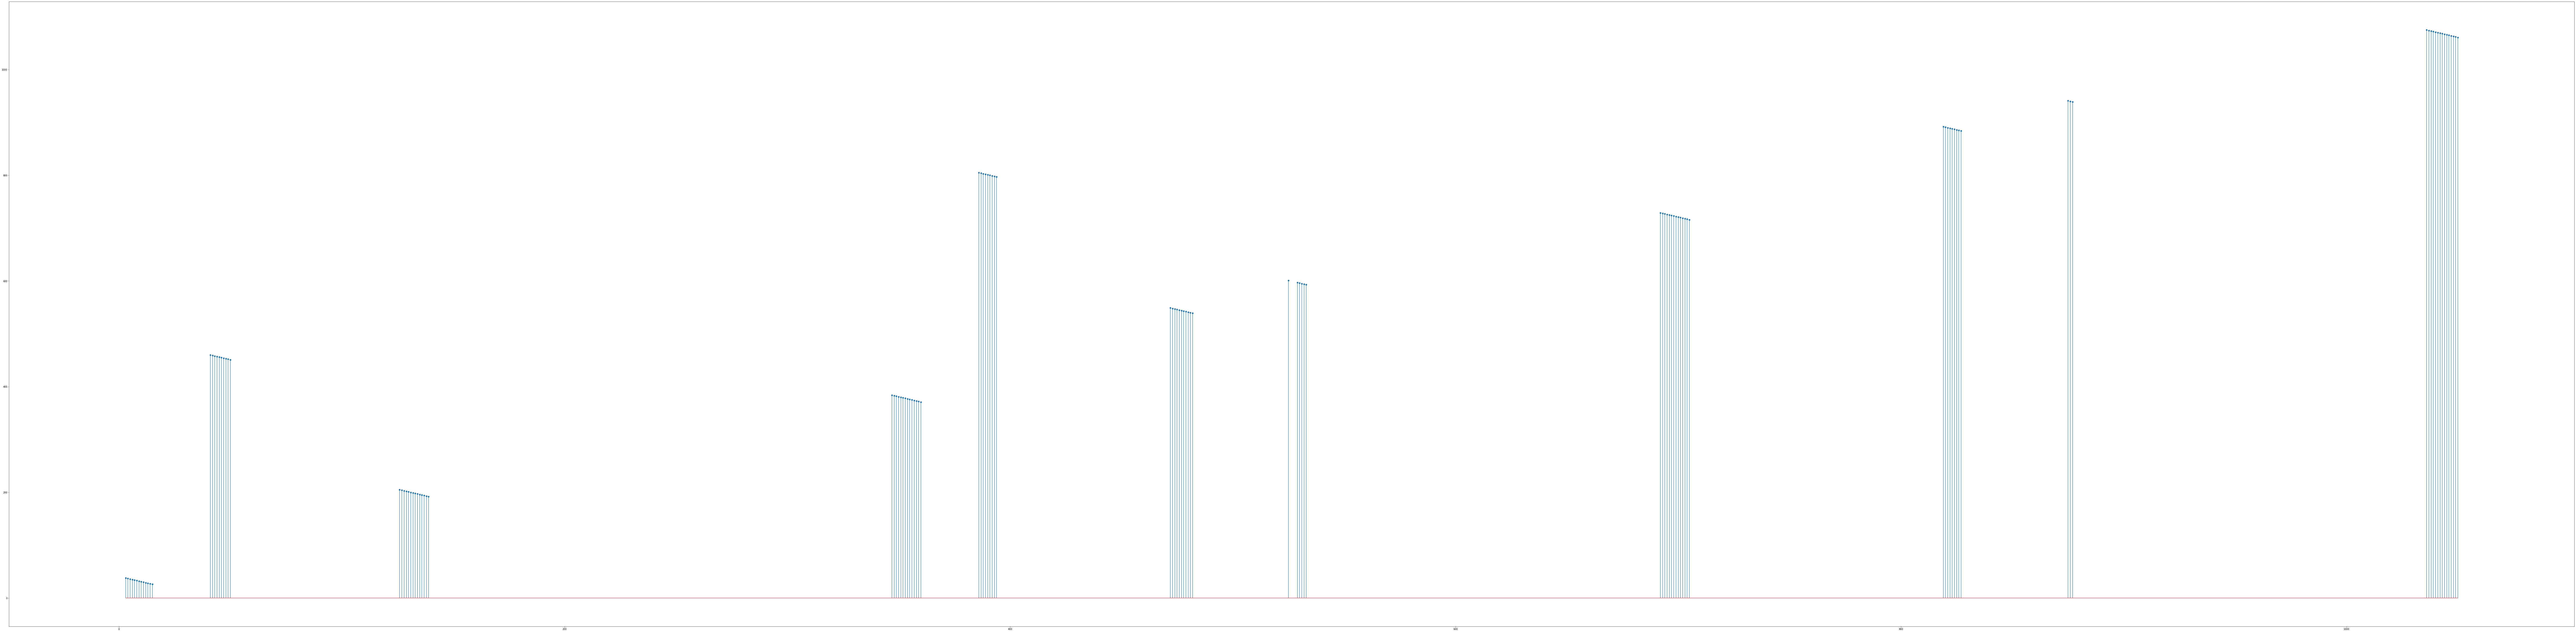

In [36]:
df_bp.rename({0:'Bp1', 1:'Bp2', 2:'Prob'}, axis=1,inplace=True)
plt.figure(figsize=(200,50))
plt.stem('Bp1', 'Bp2', data=df_m, use_line_collection=True)
plt.show()

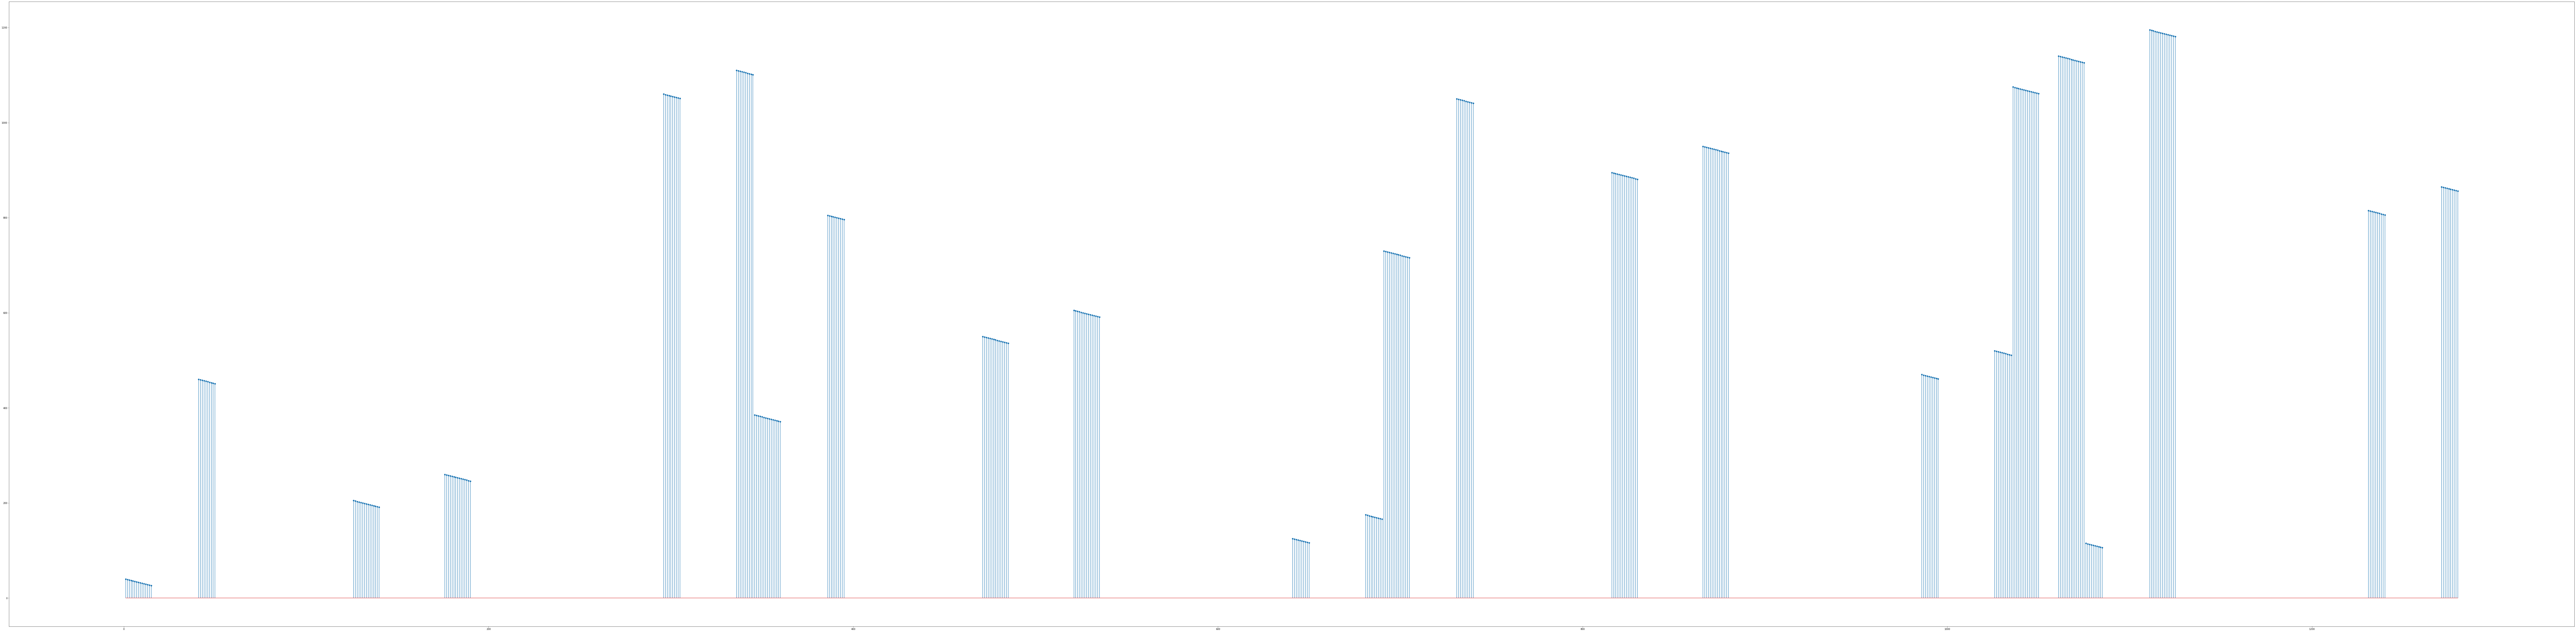

In [37]:
df_bp.rename({0:'Bp1', 1:'Bp2', 2:'Prob'}, axis=1,inplace=True)
plt.figure(figsize=(200,50))
plt.stem('Bp1', 'Bp2', data=df_bp_t, use_line_collection=True)
plt.show()


In [38]:
import numpy as np
marks = [98, 94, 92, 82, 82, 82, 82, 80, 80, 79, 79, 78, 77, 76, 74, 73, 72, 68, 66, 54, 53, 50, 30, 27]
np.mean(marks)
np.std(marks)

17.414074767267998